In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns

files = glob.glob('../../../PROJECTS/3MT_2023/Data/3Mt_DATA.csv')
files

def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

#PART ONE 
#PW DATA 

In [2]:
col_names = df.columns.tolist()
print(col_names)

['sample', 'Date', 'Trip', 'Station', 'Lat', 'Lon', 'Water_dapth', 'Sample_depth', 'Sample_depth_units', 'Wavguide_Path_lengths', 'BC_time', 'BC_Chamber_vol_.L.', 'Type', 'Waveguide_used', 'Notes', 'Flagged', 'Core_Salinity', 'Core_Temp_deg_C', 'Fe2_uM', 'FeT_uM', 'Fe3_uM', 'DOC_uM', 'TN_uM', 'ss_275_700_SEM', 'ss_275_295_SEM', 'ss_350_400_SEM', 'ss_275_700_HM', 'ss_275_295_HM', 'ss_350_400_HM', 'abs_254_SEM', 'abs_280_SEM', 'abs_320_SEM', 'abs_412_SEM', 'abs_440_SEM', 'abs_254_HM', 'abs_280_HM', 'abs_320_HM', 'abs_412_HM', 'abs_440_HM', 'SR_SEM', 'SR_HM', 'X350_intergration', 'bcorr', 'abs_254', 'abs_320', 'abs_350', 'abs_412', 'abs_440']


In [3]:
unique_names = df['Type'].unique()
print(unique_names)

[nan 'NISK' 'PW' 'LANDSYR' 'RHZ']


In [4]:
#select Pore Waters 
ds_grouped = df.groupby(["Type"])
ds_pw = ds_grouped.get_group("PW")
ds_pw

,sample,Date,Trip,Station,Lat,Lon,Water_dapth,Sample_depth,Sample_depth_units,Wavguide_Path_lengths,...,abs_440_HM,SR_SEM,SR_HM,X350_intergration,bcorr,abs_254,abs_320,abs_350,abs_412,abs_440
17,211911,7/15/2021,GOM2021,St.MK,NaN,NaN,NaN,0,CM,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,211912,7/15/2021,GOM2021,St.MK,NaN,NaN,NaN,0.35,CM,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,211913,7/15/2021,GOM2021,St.MK,NaN,NaN,NaN,1.05,CM,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,211914,7/15/2021,GOM2021,St.MK,NaN,NaN,NaN,1.75,CM,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,211915,7/15/2021,GOM2021,St.MK,NaN,NaN,NaN,2.45,CM,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,225320,7/23/2022,GOM22SU,St.MK,NaN,NaN,NaN,24.7,CM,0.01,...,8.465504,0.077697,0.003507,-0.066335,1.686142,40.92477,21.03662,15.84701,8.621079,6.790668
3382,225320,7/23/2022,GOM22SU,St.MK,NaN,NaN,NaN,24.7,CM,0.01,...,8.465504,0.077697,0.003507,-0.066335,1.686142,40.92477,21.03662,15.84701,8.621079,6.790668
3383,225321,7/23/2022,GOM22SU,St.MK,NaN,NaN,NaN,27.7,CM,0.01,...,14.743150,0.038092,0.002015,-0.153889,4.674418,57.91260,30.20306,22.92821,12.730160,10.150610
3384,225322,7/23/2022,GOM22SU,St.MK,NaN,NaN,NaN,30.7,CM,0.01,...,2.894414,0.282066,0.025688,-0.034157,-0.544937,37.84215,15.38429,10.48489,4.627782,3.439168


In [5]:
unique_names = ds_pw['Station'].unique()
print(unique_names)

['St.MK' 'St.5B' 'St.4' 'St.14' 'St.9' 'St.2' 'St.15' 'St.16' 'St.11'
 'St.7' 'St.13' 'St.12' 'St.7 ']


In [6]:
# calculate mean salary by category
mean_ = df.groupby('Station')['Water_dapth'].mean()

# display mean salary by category
print(mean_)

Station
St.11      944.111111
St.12      985.000000
St.13      418.754717
St.14       89.750769
St.14.5    105.000000
St.15      278.355556
St.16       60.815385
St.16-2     16.100000
St.2        62.395062
St.4        16.823288
St.5B       12.731707
St.6        13.600000
St.7        39.335714
St.7              NaN
St.9        79.102410
St.9              NaN
St.MK       17.478788
St.MK             NaN
St.MK-2     13.300000
Name: Water_dapth, dtype: float64


In [7]:
#giv stations depth
cat_to_num = {'St.MK': 17.4, 'St.5B': 12.7, 'St.4': 16.8, 
             'St.14': 89.7, 'St.9': 79.0, 'St.2': 62.3, 
             'St.15': 278.6, 'St.16': 60.8, 'St.11': 944.4,
              'St.7': 39.2, 'St.13': 418.7, 'St.12': 986.5}
ds_pw['Depth_Num'] = ds_pw['Station'].map(cat_to_num)

C:\Users\12532\AppData\Local\Temp\ipykernel_9844\1026159993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_pw['Depth_Num'] = ds_pw['Station'].map(cat_to_num)


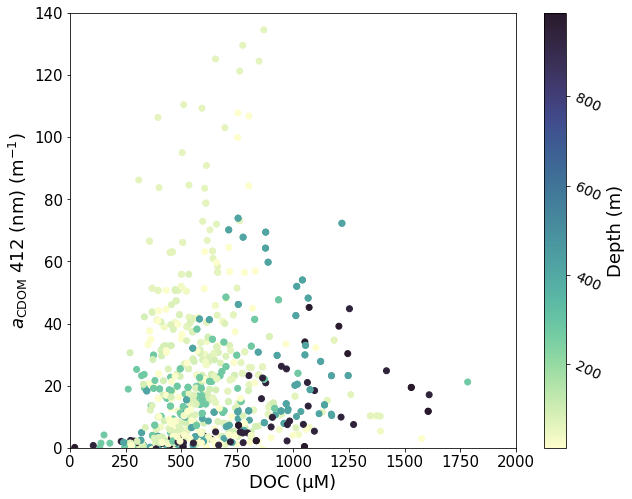

In [8]:
#COVAR PLOTS
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cmocean.cm as cmo
from pylab import rcParams

y = ds_pw['abs_412']
x = ds_pw['DOC_uM']
colors = ds_pw['Depth_Num']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.deep)

# set plot title and labels
plt.title('')
plt.xlabel('DOC (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,140)
plt.xlim(0,2000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('Depth (m)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/corvar_doc_cdom.png")

plt.show()

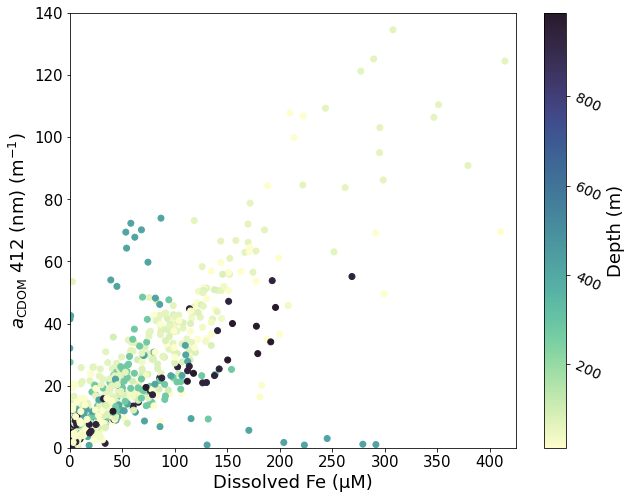

In [9]:
y = ds_pw['abs_412']
x = ds_pw['FeT_uM']
colors = ds_pw['Depth_Num']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.deep)

# set plot title and labels
plt.title('')
plt.xlabel('Dissolved Fe (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,140)
plt.xlim(0,425)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('Depth (m)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/corvar_FeT_cdom.png")

plt.show()

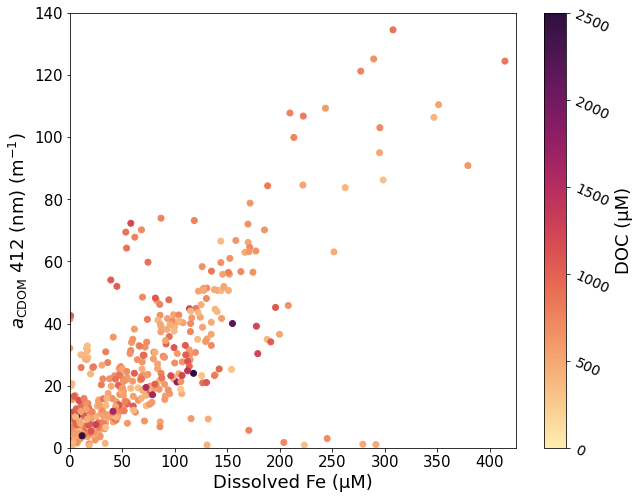

In [10]:
y = ds_pw['abs_412']
x = ds_pw['FeT_uM']
colors = ds_pw['DOC_uM']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.matter, vmin=0, vmax=2500)

# set plot title and labels
plt.title('')
plt.xlabel('Dissolved Fe (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,140)
plt.xlim(0,425)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('DOC (\u03BCM)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/corvar_FeT_cdom_color_DOC.png")

plt.show()

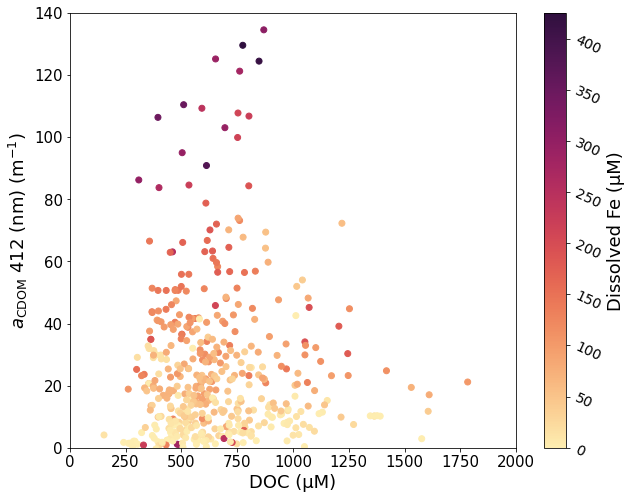

In [11]:
y = ds_pw['abs_412']
x = ds_pw['DOC_uM']
colors = ds_pw['FeT_uM']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.matter, vmin=0, vmax=425)

# set plot title and labels
plt.title('')
plt.xlabel('DOC (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,140)
plt.xlim(0,2000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('Dissolved Fe (\u03BCM)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/corvar_DOC_cdom_color_fe.png")

plt.show()

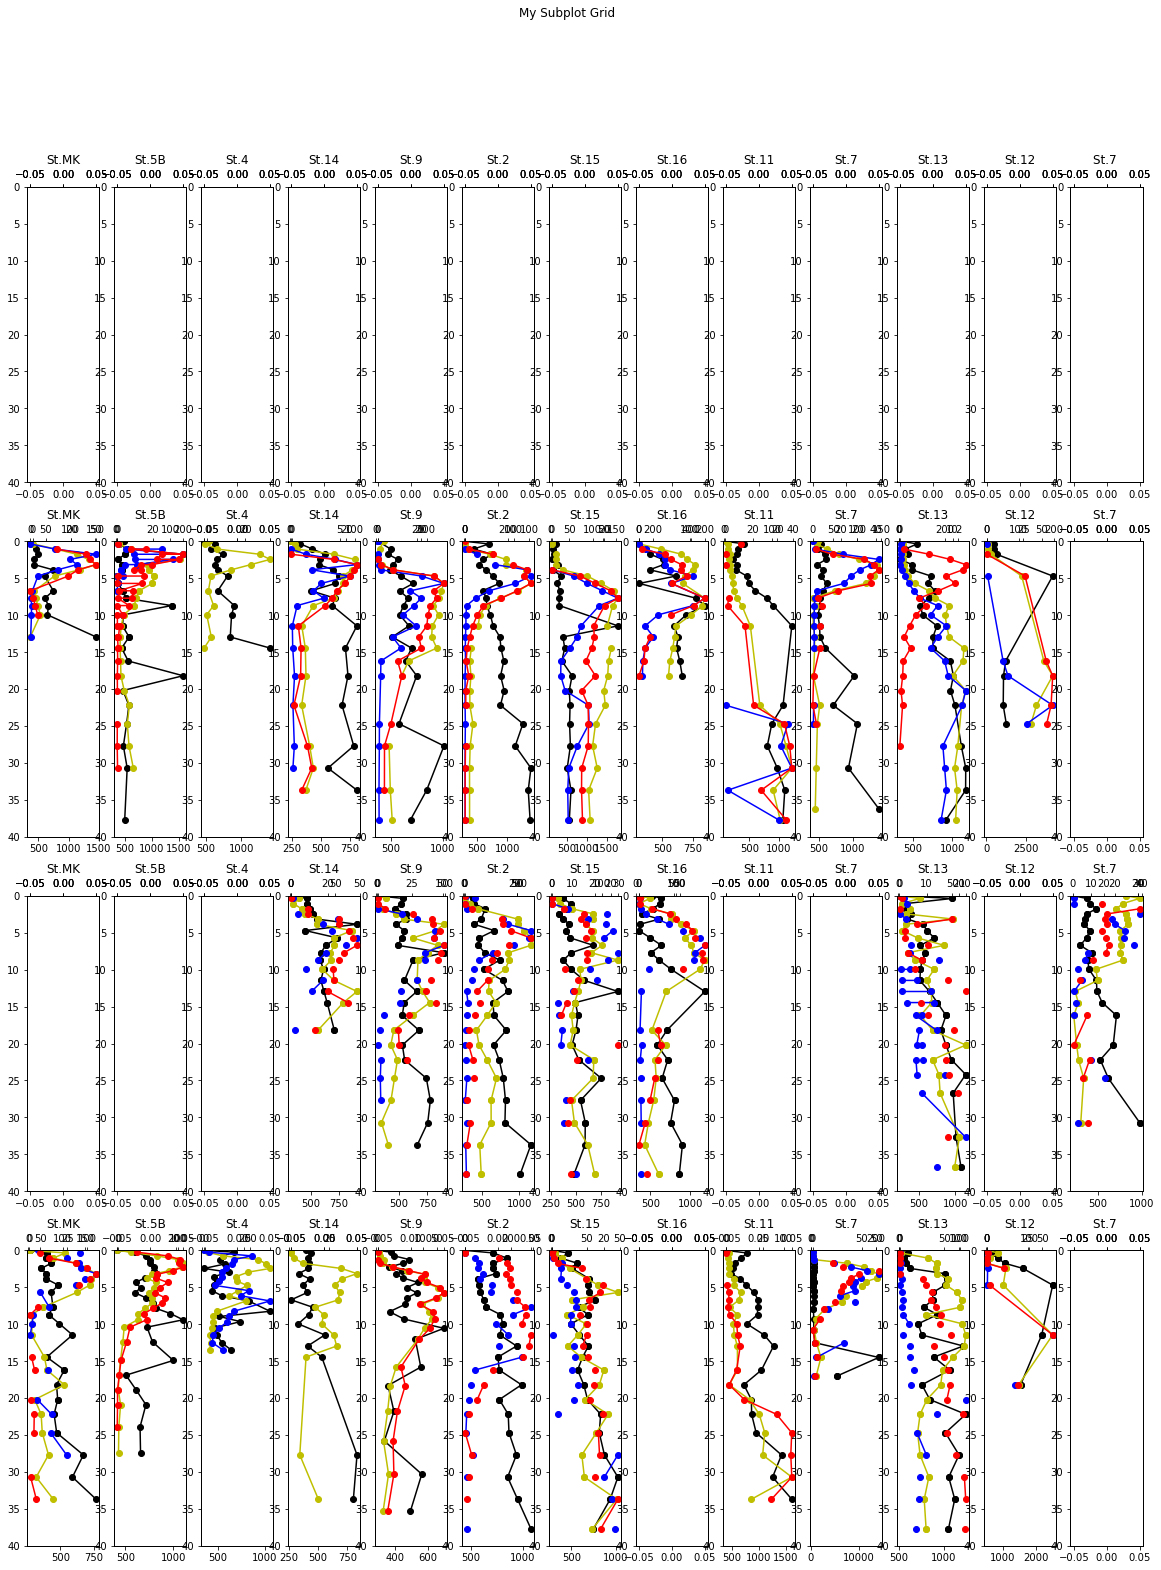

In [12]:
# get the unique values for each group
group2_vals = ds_pw['Station'].unique()
group1_vals = ds_pw['Trip'].unique()

# create a grid of subplots
fig, axs = plt.subplots(len(group1_vals), len(group2_vals), figsize=(20, 25))

# iterate over the subplots and plot the appropriate data
for i, group1_val in enumerate(group1_vals):
    for j, group2_val in enumerate(group2_vals):
        ax = axs[i, j]
        data = ds_pw[(ds_pw['Station'] == group2_val) & (ds_pw['Trip'] == group1_val)]
        data = data.dropna(subset=['DOC_uM'])
        
        DOC_uM = data['DOC_uM'] #X var 
        DOC_uM = np.asarray(DOC_uM, dtype=float).ravel()
        
        Sample_depth = data['Sample_depth'] #X var 
        Sample_depth = np.asarray(Sample_depth, dtype=float).ravel()
        
        ax.plot(DOC_uM, Sample_depth, 'o', ls='-', c='black')
        #ax.set_xlim(0,2000)
        ax.set_ylim(40,0)
        
        abs_412 = data['abs_412'] #X var 
        abs_412 = np.asarray(abs_412, dtype=float).ravel()
        
        ax2 = ax.twiny()
        ax2.plot(abs_412, Sample_depth, 'o', ls='-', c='y')
        #ax2.set_xlim(0,150)
        
        Fe2_uM = data['Fe2_uM'] 
        Fe2_uM = np.asarray(Fe2_uM, dtype=float).ravel()
        
        ax3 = ax.twiny()
        ax3.plot(Fe2_uM, Sample_depth, 'o', ls='-', c='b')
        #ax3.set_xlim(0,25)
        
        FeT_uM = data['FeT_uM']
        FeT_uM = np.asarray(FeT_uM, dtype=float).ravel()
        
        ax4 = ax.twiny()
        ax4.plot(FeT_uM, Sample_depth, 'o', ls='-', c='r')
        #ax4.set_xlim(0,25)
        
        ax.set_title(f'{group2_val}')

# add a global title to the figure
fig.suptitle('My Subplot Grid')

# show the plot
plt.show()

Index(['sample', 'Date', 'Trip', 'Station', 'Lat', 'Lon', 'Water_dapth',
       'Sample_depth', 'Sample_depth_units', 'Wavguide_Path_lengths',
       'BC_time', 'BC_Chamber_vol_.L.', 'Type', 'Waveguide_used', 'Notes',
       'Flagged', 'Core_Salinity', 'Core_Temp_deg_C', 'Fe2_uM', 'FeT_uM',
       'Fe3_uM', 'DOC_uM', 'TN_uM', 'ss_275_700_SEM', 'ss_275_295_SEM',
       'ss_350_400_SEM', 'ss_275_700_HM', 'ss_275_295_HM', 'ss_350_400_HM',
       'abs_254_SEM', 'abs_280_SEM', 'abs_320_SEM', 'abs_412_SEM',
       'abs_440_SEM', 'abs_254_HM', 'abs_280_HM', 'abs_320_HM', 'abs_412_HM',
       'abs_440_HM', 'SR_SEM', 'SR_HM', 'X350_intergration', 'bcorr',
       'abs_254', 'abs_320', 'abs_350', 'abs_412', 'abs_440', 'Depth_Num'],
      dtype='object')


Text(0.5, 0.98, 'GOM22SU')

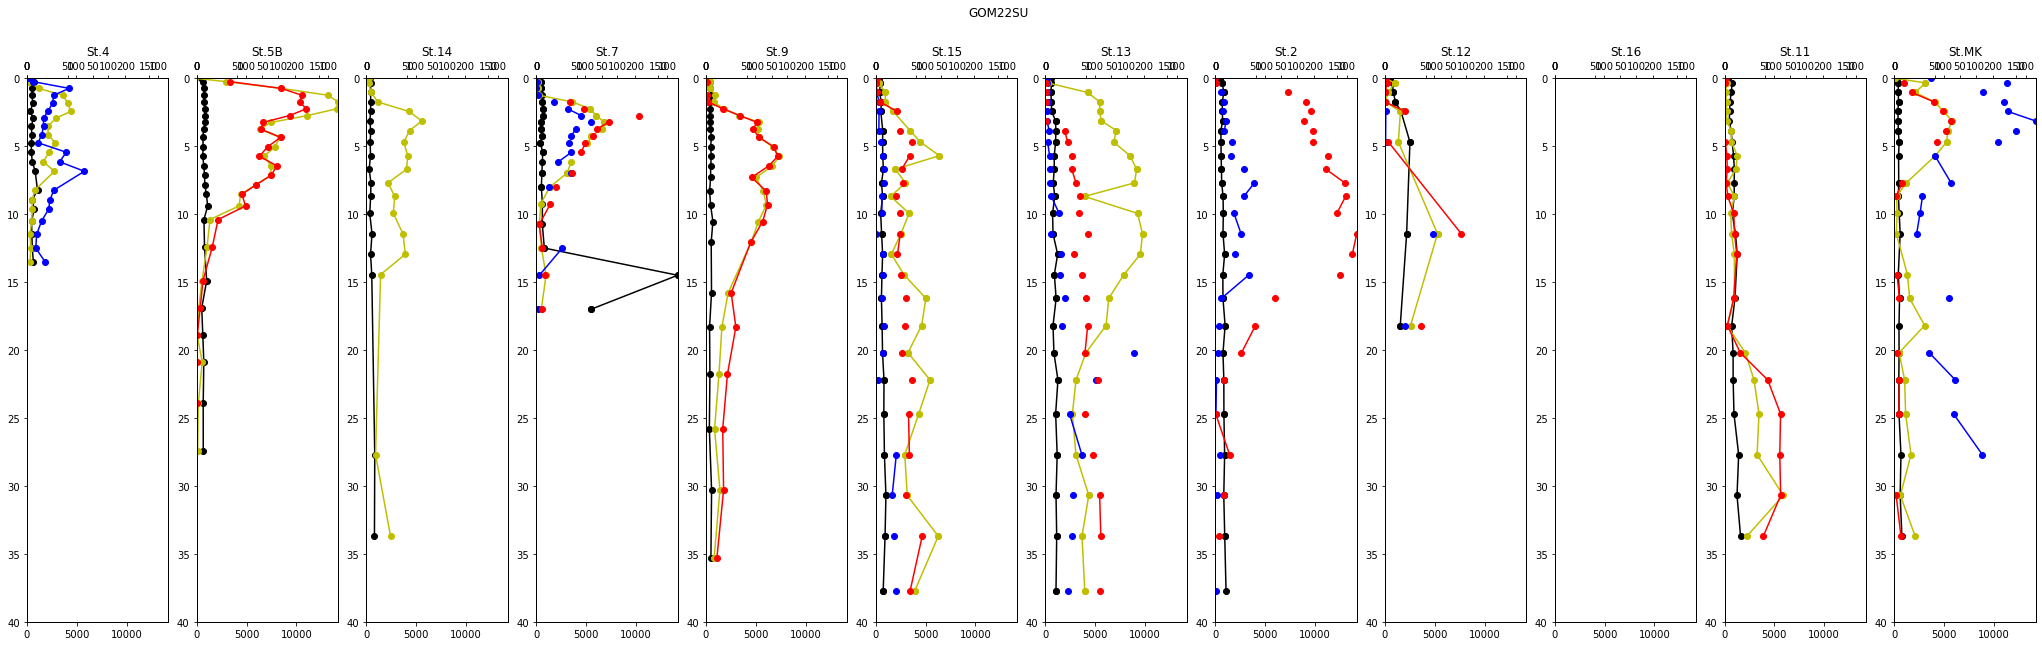

In [13]:
#data set that is just one camp at a time 
select = "GOM22SU"

ds = ds_pw[ds_pw['Trip'] == select]

print(ds.columns)

col_order = ds['Station'].unique()

station_vals = col_order

fig, axs = plt.subplots(nrows=1, ncols=len(station_vals), figsize=(len(station_vals)*3, 10))

for j, station_val in enumerate(station_vals):
    ax = axs[j]
    data = ds[(ds['Station'] == station_val)]
    
    data = data.dropna(subset=['DOC_uM'])
    
    DOC_uM = data['DOC_uM'] #X var 
    DOC_uM = np.asarray(DOC_uM, dtype=float).ravel()
    
    Sample_depth = data['Sample_depth'] #X var 
    Sample_depth = np.asarray(Sample_depth, dtype=float).ravel()
        
    ax.plot(DOC_uM, Sample_depth, 'o', ls='-', c='black')
    ax.set_xlim(0,ds['DOC_uM'].max())
    ax.set_ylim(40,0)
        
    abs_412 = data['abs_412'] #X var 
    abs_412 = np.asarray(abs_412, dtype=float).ravel()
        
    ax2 = ax.twiny()
    ax2.plot(abs_412, Sample_depth, 'o', ls='-', c='y')
    ax2.set_xlim(0,ds['abs_412'].max())
        
    Fe2_uM = data['Fe2_uM'] 
    Fe2_uM = np.asarray(Fe2_uM, dtype=float).ravel()
        
    ax3 = ax.twiny()
    ax3.plot(Fe2_uM, Sample_depth, 'o', ls='-', c='b')
    ax3.set_xlim(0,ds['Fe2_uM'].max())
        
    FeT_uM = data['FeT_uM']
    FeT_uM = np.asarray(FeT_uM, dtype=float).ravel()
        
    ax4 = ax.twiny()
    ax4.plot(FeT_uM, Sample_depth, 'o', ls='-', c='r')
    ax4.set_xlim(0,ds['FeT_uM'].max())
        
    ax.set_title(f'{station_val}')

# add a global title to the figure
fig.suptitle(select)

In [14]:
#data set that is just one camp at a time 
select = "GOM21FA"

ds = ds_pw[ds_pw['Trip'] == select]

print(ds.columns)

col_order = ds['Station'].unique()

ds['date_time'] = pd.to_datetime(ds['Date'])
ds['dates'] = ds['date_time'].dt.date

Index(['sample', 'Date', 'Trip', 'Station', 'Lat', 'Lon', 'Water_dapth',
       'Sample_depth', 'Sample_depth_units', 'Wavguide_Path_lengths',
       'BC_time', 'BC_Chamber_vol_.L.', 'Type', 'Waveguide_used', 'Notes',
       'Flagged', 'Core_Salinity', 'Core_Temp_deg_C', 'Fe2_uM', 'FeT_uM',
       'Fe3_uM', 'DOC_uM', 'TN_uM', 'ss_275_700_SEM', 'ss_275_295_SEM',
       'ss_350_400_SEM', 'ss_275_700_HM', 'ss_275_295_HM', 'ss_350_400_HM',
       'abs_254_SEM', 'abs_280_SEM', 'abs_320_SEM', 'abs_412_SEM',
       'abs_440_SEM', 'abs_254_HM', 'abs_280_HM', 'abs_320_HM', 'abs_412_HM',
       'abs_440_HM', 'SR_SEM', 'SR_HM', 'X350_intergration', 'bcorr',
       'abs_254', 'abs_320', 'abs_350', 'abs_412', 'abs_440', 'Depth_Num'],
      dtype='object')


C:\Users\12532\AppData\Local\Temp\ipykernel_9844\2593775479.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['date_time'] = pd.to_datetime(ds['Date'])
C:\Users\12532\AppData\Local\Temp\ipykernel_9844\2593775479.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['dates'] = ds['date_time'].dt.date


In [15]:
#GET ORDERS FOR FIGS
max_depth = ds.groupby(['Station'])['Depth_Num'].mean().reset_index()
max_depth

cols = ['Depth_Num','Station']
df_locs = pd.DataFrame(max_depth, columns=cols)
df_locs = df_locs.sort_values('Depth_Num')

# selecting rows based on condition
#options = ['St.2','St.9','St.14',  'St.15', 'St.13']
#df_locs = df_locs.loc[df_locs['Station'].isin(options)]

col_order = df_locs["Station"].tolist()
col_maxd = df_locs["Depth_Num"].tolist()
col_maxd = [round(x, 1) for x in col_maxd]


print(col_order) 
print(col_maxd)

['St.5B', 'St.4', 'St.MK', 'St.7', 'St.16', 'St.2', 'St.9', 'St.14', 'St.15', 'St.13', 'St.11', 'St.12']
[12.7, 16.8, 17.4, 39.2, 60.8, 62.3, 79.0, 89.7, 278.6, 418.7, 944.4, 986.5]


In [16]:
max_depth = ds.groupby(['Station','Date','dates'])['Depth_Num'].mean().reset_index()
max_depth

cols = ['Station','Date','dates','Depth_Num']
df_locs = pd.DataFrame(max_depth, columns=cols)
df_locs = df_locs.sort_values('Depth_Num')


# selecting rows based on condition
#options = ['St.2','St.9','St.14',  'St.15', 'St.13']
#df_locs = df_locs.loc[df_locs['Station'].isin(options)]

#df_locs
col_order = df_locs["Station"].tolist()
col_date = df_locs["Date"].tolist()
col_dates = df_locs["dates"].tolist()
col_maxd = df_locs["Depth_Num"].tolist()
col_maxd = [round(x, 1) for x in col_maxd]

sub_num = len(df_locs)-1
width_num = len(df_locs)

df_locs

,Station,Date,dates,Depth_Num
8,St.5B,10/25/2021,2021-10-25,12.7
7,St.4,10/27/2021,2021-10-27,16.8
11,St.MK,10/27/2021,2021-10-27,17.4
9,St.7,10/30/2021,2021-10-30,39.2
5,St.16,11/8/2021,2021-11-08,60.8
6,St.2,11/3/2021,2021-11-03,62.3
10,St.9,11/1/2021,2021-11-01,79.0
3,St.14,10/31/2021,2021-10-31,89.7
4,St.15,11/2/2021,2021-11-02,278.6
2,St.13,11/7/2021,2021-11-07,418.7


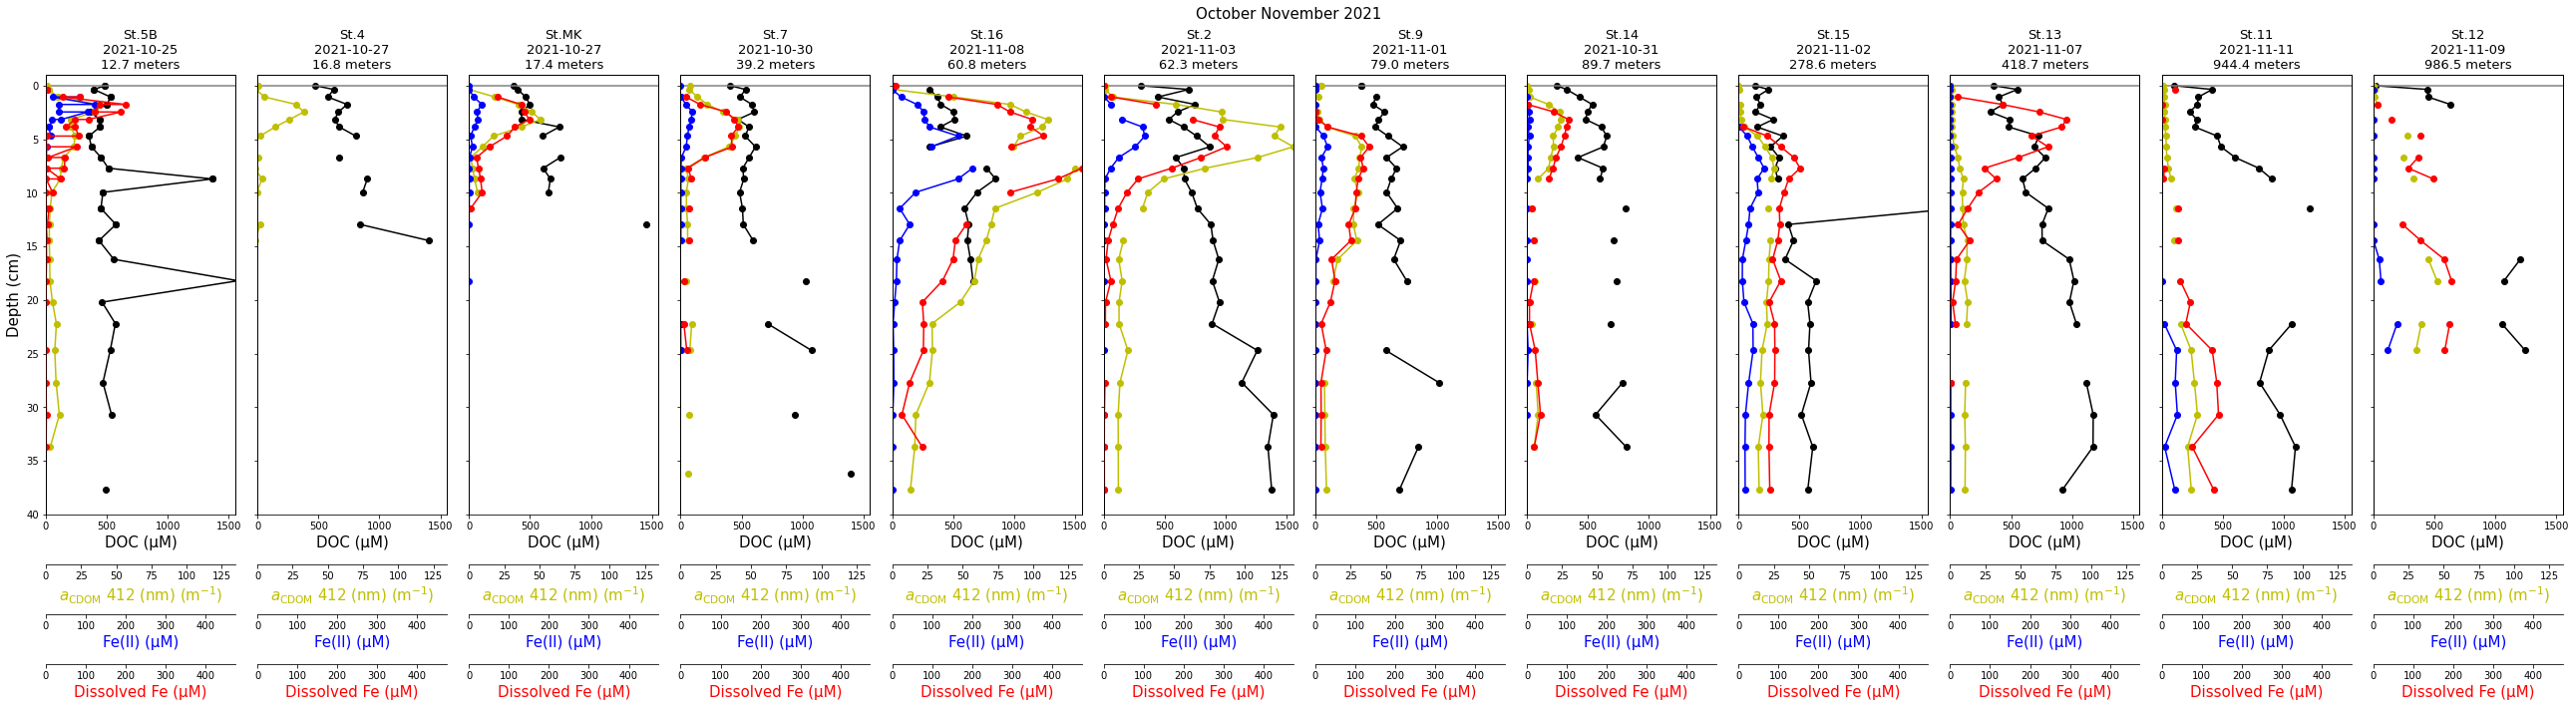

In [17]:
station_vals = col_order

fig, axs = plt.subplots(nrows=1, ncols=len(station_vals), figsize=(len(station_vals)*3, 10))

for j, station_val in enumerate(station_vals):
    ax = axs[j]
    data = ds[(ds['Station'] == station_val)]
        
    #PLOT DOC
    DOC_uM = data['DOC_uM'] #X var 
    DOC_uM = np.asarray(DOC_uM, dtype=float).ravel()
        
    Sample_depth = data['Sample_depth'] #X var 
    Sample_depth = np.asarray(Sample_depth, dtype=float).ravel()
         
    ax.plot(DOC_uM, Sample_depth, 'o', ls='-', c='black')
    ax.set_xlim(0,ds['DOC_uM'].mean()+ds['DOC_uM'].std()*2.5)
    ax.set_ylim(40,-1)
    ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
    #plot lables 
    
    #Set x-axis label on bottom subplots
    ax.set_xlabel('DOC (\u03BCM)', size = 15, c='black')
    #Set y-axis label on bottom subplots
    if j == 0:
        ax.set_ylabel('Depth (cm)', size= 15)
        
    #PLOT CDOM
    abs_412 = data['abs_412'] #X var 
    abs_412 = np.asarray(abs_412, dtype=float).ravel()
    
    ax2 = ax.twiny()
    ax2.plot(abs_412, Sample_depth, 'o', ls='-', c='y')
    ax2.set_xlim(0,ds['abs_412'].max())
    
    #Set x-axis label on bottom subplots
    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 50))
    ax2.set_xlabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', size= 15, c='y')
        
    Fe2_uM = data['Fe2_uM'] 
    Fe2_uM = np.asarray(Fe2_uM, dtype=float).ravel()
        
    ax3 = ax.twiny()
    ax3.plot(Fe2_uM, Sample_depth, 'o', ls='-', c='b')
    ax3.set_xlim(0,ds['FeT_uM'].max())
    #Set x-axis label on bottom subplots
    ax3.xaxis.set_ticks_position('bottom')
    ax3.xaxis.set_label_position('bottom')
    ax3.spines['bottom'].set_position(('outward', 100))
    ax3.set_xlabel('Fe(II) (\u03BCM)', size= 15, c='b')
        
    FeT_uM = data['FeT_uM']
    FeT_uM = np.asarray(FeT_uM, dtype=float).ravel()
        
    ax4 = ax.twiny()
    ax4.plot(FeT_uM, Sample_depth, 'o', ls='-', c='r')
    ax4.set_xlim(0,ds['FeT_uM'].max())
    #Set x-axis label on bottom subplots
    ax4.xaxis.set_ticks_position('bottom')
    ax4.xaxis.set_label_position('bottom')
    ax4.spines['bottom'].set_position(('outward', 150))
    ax4.set_xlabel('Dissolved Fe (\u03BCM)', size= 15, c='r')
            
    #turn off other axis
    if j != 0:
        ax.set_yticklabels([])
        ax2.set_yticklabels([])
        ax3.set_yticklabels([])
        ax4.set_yticklabels([])
        
    ax.set_title(f'{station_val}\n{col_dates[j]}\n{col_maxd[j]} meters', size = 13)
            
# add a global title to the figure
fig.suptitle("October November 2021", size = 15)
fig.set_facecolor('w')
plt.tight_layout()

#save plot 
plt.savefig("../../../PROJECTS/GOM21FA_PW_profiles.png")

# show the plot
plt.show()

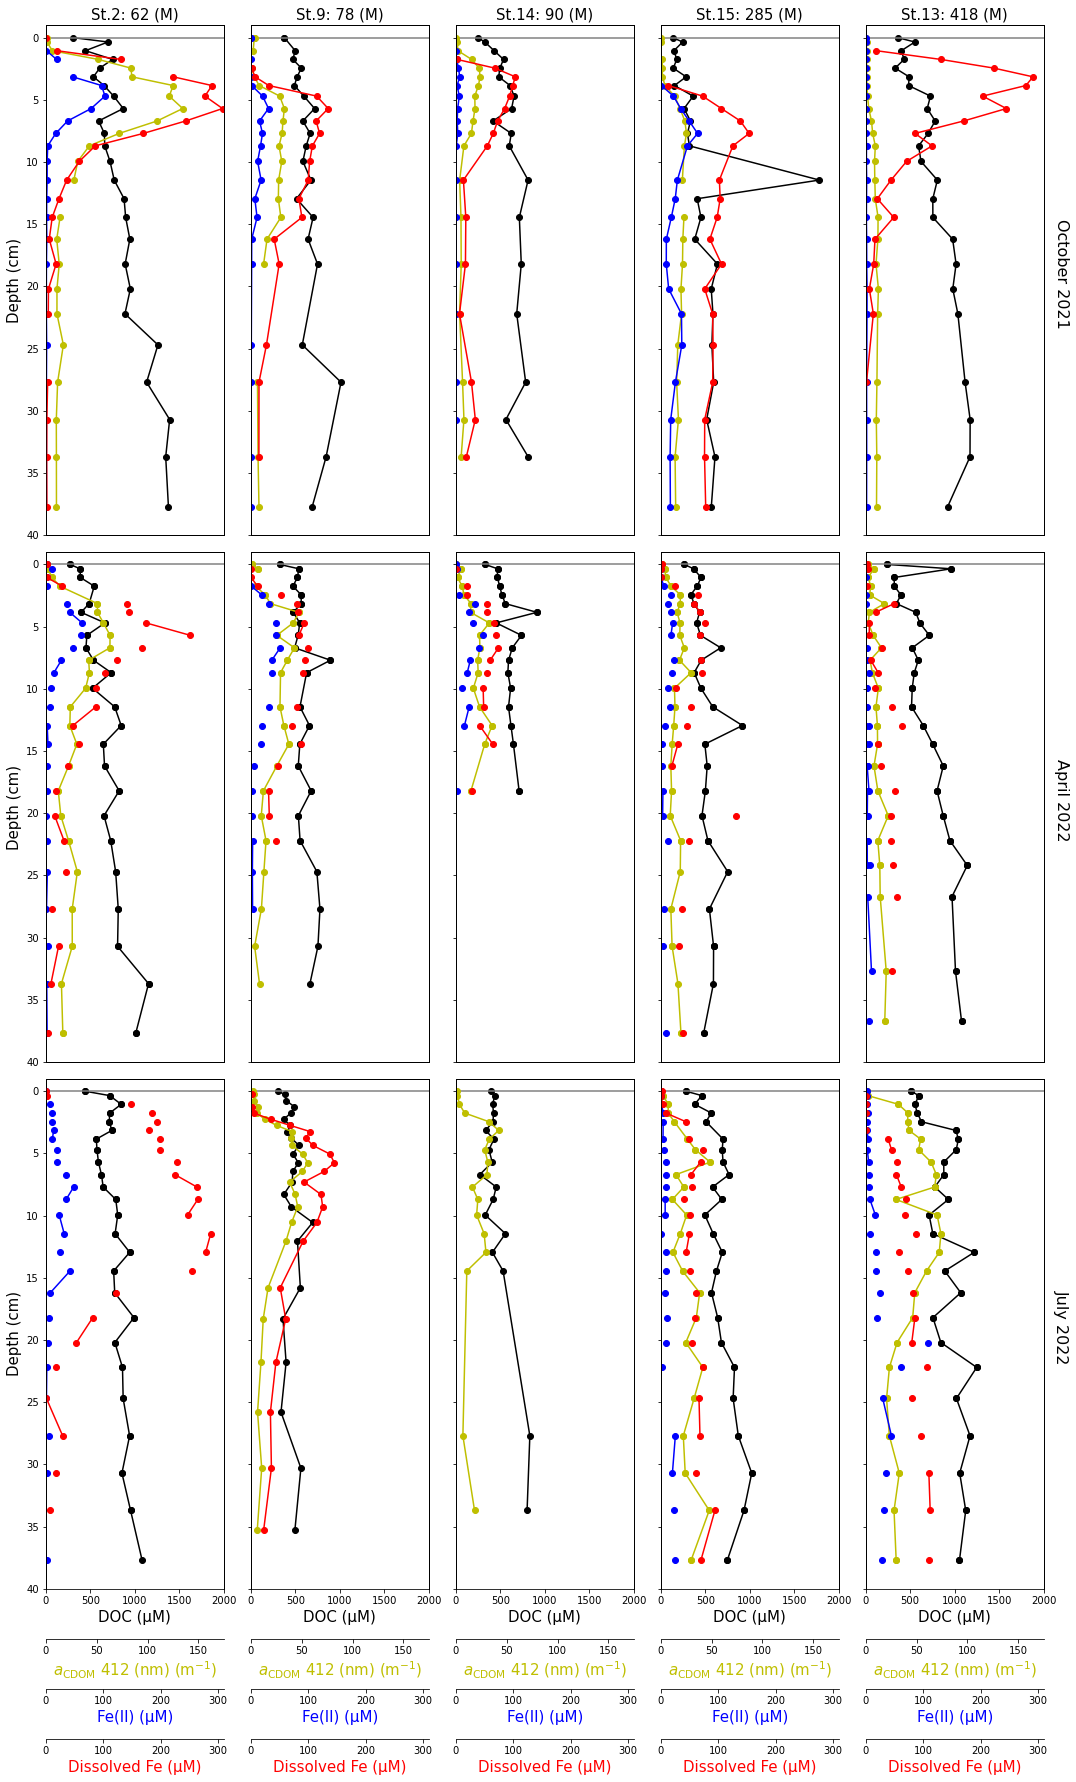

In [18]:
# get the unique values for each group
group2_vals = ['St.2','St.9','St.14',  'St.15', 'St.13']
group1_vals = ['GOM21FA', 'GOM22SP', 'GOM22SU']

# create a grid of subplots
fig, axs = plt.subplots(len(group1_vals), len(group2_vals), figsize=(15, 25), facecolor='w')

# set unique titles for the top row subplots
axs[0, 0].set_title("St.2: 62 (M)", size = 15)
axs[0, 1].set_title("St.9: 78 (M)", size = 15)
axs[0, 2].set_title("St.14: 90 (M)", size = 15)
axs[0, 3].set_title("St.15: 285 (M)", size = 15)
axs[0, 4].set_title("St.13: 418 (M)", size = 15)

axs[0, -1].text(2200,19, 'October 2021', ha='center', va='center', size = 16 , rotation = 270 )
axs[1, -1].text(2200,19, 'April 2022', ha='center', va='center', size = 16 , rotation = 270 )
axs[2, -1].text(2200,19, 'July 2022', ha='center', va='center', size = 16 , rotation = 270 )

# iterate over the subplots and plot the appropriate data
for i, group1_val in enumerate(group1_vals):
    for j, group2_val in enumerate(group2_vals):
        ax = axs[i, j]
        data = ds_pw[(ds_pw['Station'] == group2_val) & (ds_pw['Trip'] == group1_val)]
        data = data.dropna(subset=['DOC_uM'])
        
        #PLOT DOC
        DOC_uM = data['DOC_uM'] #X var 
        DOC_uM = np.asarray(DOC_uM, dtype=float).ravel()
        
        Sample_depth = data['Sample_depth'] #X var 
        Sample_depth = np.asarray(Sample_depth, dtype=float).ravel()
         
        ax.plot(DOC_uM, Sample_depth, 'o', ls='-', c='black')
        ax.set_xlim(0,2000)
        ax.set_ylim(40,-1)
        ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
        #plot lables 
        #Set x-axis label on bottom subplots
        if i == len(group1_vals) - 1:
            ax.set_xlabel('DOC (\u03BCM)', size = 15, c='black')
        #Set y-axis label on bottom subplots
        if j == 0:
            ax.set_ylabel('Depth (cm)', size= 15)
        
        #PLOT CDOM
        abs_412 = data['abs_412'] #X var 
        abs_412 = np.asarray(abs_412, dtype=float).ravel()
        
        ax2 = ax.twiny()
        ax2.plot(abs_412, Sample_depth, 'o', ls='-', c='y')
        ax2.set_xlim(0,175)
        
        #Set x-axis label on bottom subplots
        if i == len(group1_vals) - 1:
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 50))
            ax2.set_xlabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', size= 15, c='y')
        
        Fe2_uM = data['Fe2_uM'] 
        Fe2_uM = np.asarray(Fe2_uM, dtype=float).ravel()
        
        ax3 = ax.twiny()
        ax3.plot(Fe2_uM, Sample_depth, 'o', ls='-', c='b')
        ax3.set_xlim(0,310)
        #Set x-axis label on bottom subplots
        if i == len(group1_vals) - 1:
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 100))
            ax3.set_xlabel('Fe(II) (\u03BCM)', size= 15, c='b')
        
        FeT_uM = data['FeT_uM']
        FeT_uM = np.asarray(FeT_uM, dtype=float).ravel()
        
        ax4 = ax.twiny()
        ax4.plot(FeT_uM, Sample_depth, 'o', ls='-', c='r')
        ax4.set_xlim(0,310)
        #Set x-axis label on bottom subplots
        if i == len(group1_vals) - 1:
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 150))
            ax4.set_xlabel('Dissolved Fe (\u03BCM)', size= 15, c='r')
            
        #turn off other axis
        if i != len(group1_vals)-1:
            ax.set_xticklabels([])
            ax.tick_params(bottom=False)
            ax2.set_xticklabels([])
            ax2.tick_params(top=False)
            ax3.set_xticklabels([])
            ax3.tick_params(top=False)
            ax4.set_xticklabels([])
            ax4.tick_params(top=False)
        if j != 0:
            ax.set_yticklabels([])
            ax2.set_yticklabels([])
            ax3.set_yticklabels([])
            ax4.set_yticklabels([])
            
# add a global title to the figure
fig.suptitle('')
plt.tight_layout()

#save plot 
plt.savefig("../../../PROJECTS/PACE_Meeting/profiles.png")

# show the plot
plt.show()

#PART TWO
#MAPS 

In [19]:
mean_lat = ds_pw.groupby('Station')['Lat','Lon','DOC_uM','abs_412','Fe2_uM','FeT_uM'].mean().reset_index()
mean_lat
mean_lon = ds_pw.groupby('Station')['Lon'].mean().reset_index()
mean_lon

cols = ['Station','Lat','Lon','DOC_uM','abs_412','Fe2_uM','FeT_uM']
df_locs = pd.DataFrame(mean_lat, columns=cols)

# selecting rows based on condition
options = ['St.2','St.9','St.14',  'St.15', 'St.13']
df_locs = df_locs.loc[df_locs['Station'].isin(options)]

df_locs

C:\Users\12532\AppData\Local\Temp\ipykernel_9844\235698545.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_lat = ds_pw.groupby('Station')['Lat','Lon','DOC_uM','abs_412','Fe2_uM','FeT_uM'].mean().reset_index()


,Station,Lat,Lon,DOC_uM,abs_412,Fe2_uM,FeT_uM
2,St.13,NaN,NaN,778.864506,21.951633,7.609138,64.561252
3,St.14,28.727100,-89.601100,552.893641,14.983471,7.658390,44.417018
4,St.15,28.943031,-88.836210,546.680626,18.648931,11.131738,55.031455
6,St.2,28.899538,-89.593171,734.362110,31.704483,12.922883,85.202220
11,St.9,28.799781,-89.598910,551.646701,21.660572,10.308791,63.018789


In [20]:
#fill in missing 
mean_lon = df.groupby('Station')['Lon'].mean().reset_index()
lon_13_mean = mean_lon[2:3]['Lon'].mean()
df_locs.at[2, 'Lon'] = lon_13_mean

mean_lat = df.groupby('Station')['Lat'].mean().reset_index()
lat_13_mean = mean_lat[2:3]['Lat'].mean()
df_locs.at[2, 'Lat'] = lat_13_mean

df_locs

,Station,Lat,Lon,DOC_uM,abs_412,Fe2_uM,FeT_uM
2,St.13,28.524326,-89.732674,778.864506,21.951633,7.609138,64.561252
3,St.14,28.727100,-89.601100,552.893641,14.983471,7.658390,44.417018
4,St.15,28.943031,-88.836210,546.680626,18.648931,11.131738,55.031455
6,St.2,28.899538,-89.593171,734.362110,31.704483,12.922883,85.202220
11,St.9,28.799781,-89.598910,551.646701,21.660572,10.308791,63.018789


In [21]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
%matplotlib inline
import cmocean
import cmocean.cm as cmo

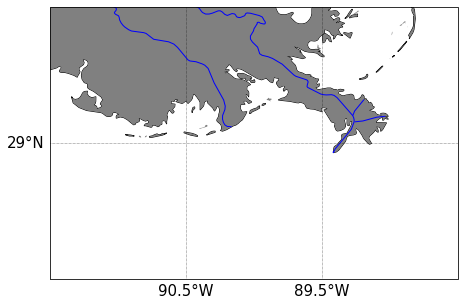

In [22]:
#pick extent 
lat_top=30
lat_bot=28
lon_left=-91.5
lon_rigth=-88.5
extent=[lon_left, lon_rigth, lat_bot, lat_top]

#making it a function

def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'black'}
    gl.ylabel_style = {'size': 15, 'color': 'black'}
    return fig, ax

fig, ax = plot_mapbase(extent)



In [23]:
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"}
plt.rcParams.update(params)

In [24]:
df_locs

,Station,Lat,Lon,DOC_uM,abs_412,Fe2_uM,FeT_uM
2,St.13,28.524326,-89.732674,778.864506,21.951633,7.609138,64.561252
3,St.14,28.727100,-89.601100,552.893641,14.983471,7.658390,44.417018
4,St.15,28.943031,-88.836210,546.680626,18.648931,11.131738,55.031455
6,St.2,28.899538,-89.593171,734.362110,31.704483,12.922883,85.202220
11,St.9,28.799781,-89.598910,551.646701,21.660572,10.308791,63.018789


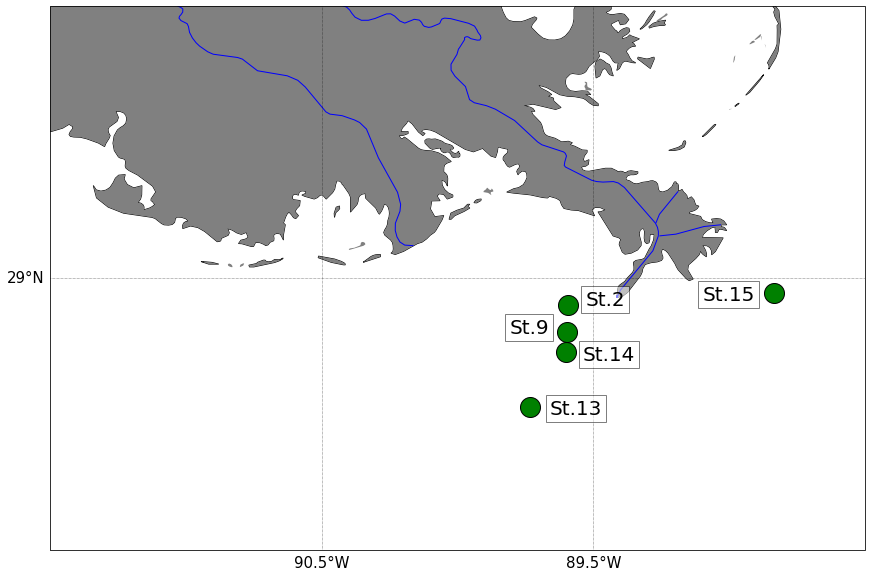

In [25]:
lons = df_locs['Lon']
lats = df_locs['Lat']
labels = df_locs['Station']

fig, ax = plot_mapbase(extent)
mappable = ax.scatter(df_locs['Lon'], df_locs['Lat'], # lon, lat variable as x,y
           c='green',
           edgecolor='k',  #you color variable
           #vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= cmo.matter, # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
           s=400, 
    transform=ccrs.PlateCarree())
ax.text(-89.66, 28.5, 'St.13', transform=ccrs.PlateCarree(), fontsize=20,
        bbox=dict(facecolor='white', alpha=0.5))
ax.text(-89.54, 28.7, 'St.14', transform=ccrs.PlateCarree(), fontsize=20,
        bbox=dict(facecolor='white', alpha=0.5))
ax.text(-89.1, 28.92, 'St.15', transform=ccrs.PlateCarree(), fontsize=20,
        bbox=dict(facecolor='white', alpha=0.5))
ax.text(-89.53, 28.899, 'St.2', transform=ccrs.PlateCarree(), fontsize=20,
        bbox=dict(facecolor='white', alpha=0.5))
ax.text(-89.81, 28.799, 'St.9', transform=ccrs.PlateCarree(), fontsize=20,
        bbox=dict(facecolor='white', alpha=0.5))
    
#cax = fig.add_axes([.565, .55, .01, .30])
#cb = fig.colorbar(mappable, cax=cax)
#ax.text(-80.26,28.3, 'Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=10, rotation=90)
#cb.set_label('Surface Water\n'+'a$_{CDOM}$ (412 nm) (1/m)', size=10, verticalalignment='left')

fig.set_size_inches(20,10)

#save plot 
plt.savefig("../../../PROJECTS/PACE_Meeting/Map.png")

KeyError: 0

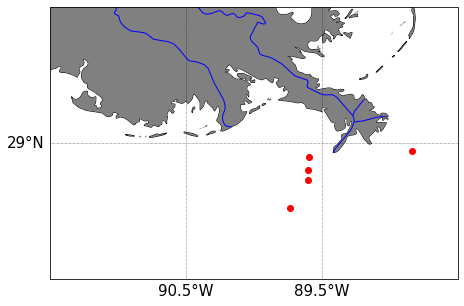

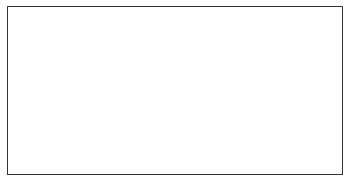

In [26]:

# Define the projection and axes for the plot
proj = ccrs.PlateCarree()
fig, ax = plot_mapbase(extent)
mappable = plt.subplots(subplot_kw={'projection': proj})

# Define the coordinates and labels from the dataframe
lons = df_locs['Lon']
lats = df_locs['Lat']
labels = df_locs['Station']

# Plot the points and labels
ax.scatter(lons, lats, color='red', transform=proj)
for i in range(len(lats)):
    ax.text(lons[i]+0.5, lats[i]+0.5, labels[i], transform=proj)

# Set the title and show the plot
ax.set_title('Points with Labels')
plt.show()


#PART THREE 
#BC DATA 

In [27]:
#select BC Waters 
ds_grouped = df.groupby(["Type"])
ds_bc = ds_grouped.get_group("LANDSYR")

In [28]:
# calculate mean salary by category
mean_ = df.groupby('Station')['Water_dapth'].mean()

#giv stations depth
cat_to_num = {'St.MK': 17.4, 'St.5B': 12.7, 'St.4': 16.8, 
             'St.14': 89.7, 'St.9': 79.0, 'St.2': 62.3, 
             'St.15': 278.6, 'St.16': 60.8, 'St.11': 944.4,
              'St.7': 39.2, 'St.13': 418.7, 'St.12': 986.5}
ds_bc['Depth_Num'] = ds_bc['Station'].map(cat_to_num)

# display mean salary by category
print(mean_)



Station
St.11      944.111111
St.12      985.000000
St.13      418.754717
St.14       89.750769
St.14.5    105.000000
St.15      278.355556
St.16       60.815385
St.16-2     16.100000
St.2        62.395062
St.4        16.823288
St.5B       12.731707
St.6        13.600000
St.7        39.335714
St.7              NaN
St.9        79.102410
St.9              NaN
St.MK       17.478788
St.MK             NaN
St.MK-2     13.300000
Name: Water_dapth, dtype: float64


C:\Users\12532\AppData\Local\Temp\ipykernel_9844\1350129050.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_bc['Depth_Num'] = ds_bc['Station'].map(cat_to_num)


In [29]:
ds_bc.loc[ds_bc['DOC_uM'] <= 10, 'DOC_uM'] = np.nan

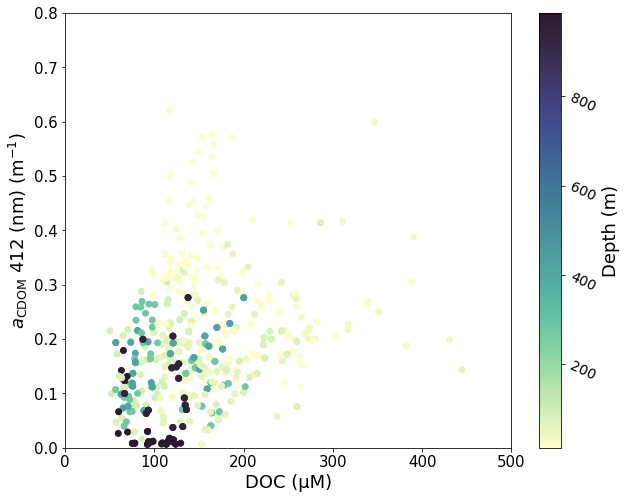

In [30]:
y = ds_bc['abs_412']
x = ds_bc['DOC_uM']
colors = ds_bc['Depth_Num']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.deep)

# set plot title and labels
plt.title('')
plt.xlabel('DOC (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,.8)
plt.xlim(0,500)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('Depth (m)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/BC_corvar_doc_cdom.png")

plt.show()

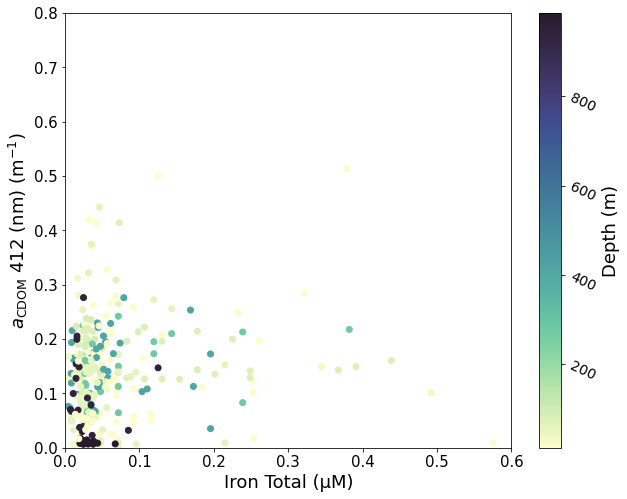

In [31]:

y = ds_bc['abs_412']
x = ds_bc['FeT_uM']
colors = ds_bc['Depth_Num']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.deep)

# set plot title and labels
plt.title('')
plt.xlabel('Iron Total (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,.8)
plt.xlim(0,.6)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('Depth (m)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/BC_corvar_FeT_cdom.png")

plt.show()

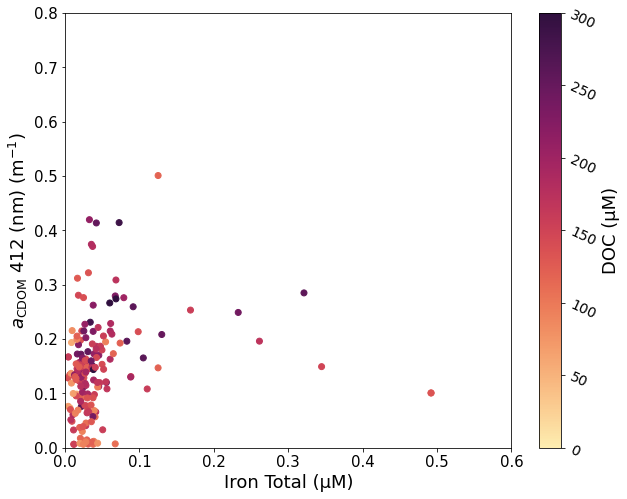

In [33]:
y = ds_bc['abs_412']
x = ds_bc['FeT_uM']
colors = ds_bc['DOC_uM']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.matter, vmin=0, vmax=300)

# set plot title and labels
plt.title('')
plt.xlabel('Iron Total (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,.8)
plt.xlim(0,.6)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('DOC (\u03BCM)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/BC_corvar_FeT_cdom_color_DOC.png")

plt.show()

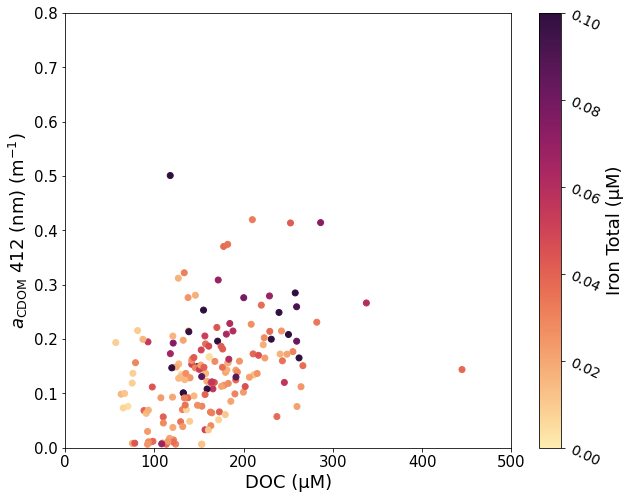

In [34]:
y = ds_bc['abs_412']
x = ds_bc['DOC_uM']
colors = ds_bc['FeT_uM']

# create scatter plot
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.scatter(x, y, c=colors, cmap=cmo.matter, vmin=0, vmax=.1)

# set plot title and labels
plt.title('')
plt.xlabel('DOC (\u03BCM)', fontsize=18)
plt.ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', fontsize=18)
plt.ylim(0,.8)
plt.xlim(0,500)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# add colorbar legend
cb = plt.colorbar()
cb.set_label('Iron Total (\u03BCM)', fontsize=18)
cb.ax.tick_params(labelsize=14, rotation = -25)

plt.savefig("../../../PROJECTS/PACE_Meeting/corvar_DOC_cdom_color_fe.png")

plt.show()

In [74]:
#data set that is just one camp at a time 
select = "GOM21FA"

ds = ds_bc[ds_bc['Trip'] == select]

print(ds.columns)

col_order = ds['Station'].unique()

ds['date_time'] = pd.to_datetime(ds['Date'])
ds['dates'] = ds['date_time'].dt.date

Index(['sample', 'Date', 'Trip', 'Station', 'Lat', 'Lon', 'Water_dapth',
       'Sample_depth', 'Sample_depth_units', 'Wavguide_Path_lengths',
       'BC_time', 'BC_Chamber_vol_.L.', 'Type', 'Waveguide_used', 'Notes',
       'Flagged', 'Core_Salinity', 'Core_Temp_deg_C', 'Fe2_uM', 'FeT_uM',
       'Fe3_uM', 'DOC_uM', 'TN_uM', 'ss_275_700_SEM', 'ss_275_295_SEM',
       'ss_350_400_SEM', 'ss_275_700_HM', 'ss_275_295_HM', 'ss_350_400_HM',
       'abs_254_SEM', 'abs_280_SEM', 'abs_320_SEM', 'abs_412_SEM',
       'abs_440_SEM', 'abs_254_HM', 'abs_280_HM', 'abs_320_HM', 'abs_412_HM',
       'abs_440_HM', 'SR_SEM', 'SR_HM', 'X350_intergration', 'bcorr',
       'abs_254', 'abs_320', 'abs_350', 'abs_412', 'abs_440', 'Depth_Num'],
      dtype='object')


C:\Users\12532\AppData\Local\Temp\ipykernel_9844\4043020541.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['date_time'] = pd.to_datetime(ds['Date'])
C:\Users\12532\AppData\Local\Temp\ipykernel_9844\4043020541.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['dates'] = ds['date_time'].dt.date


In [75]:
#GET ORDERS FOR FIGS
max_depth = ds.groupby(['Station'])['Depth_Num'].mean().reset_index()
max_depth

cols = ['Depth_Num','Station']
df_locs = pd.DataFrame(max_depth, columns=cols)
df_locs = df_locs.sort_values('Depth_Num')

# selecting rows based on condition
#options = ['St.2','St.9','St.14',  'St.15', 'St.13']
#df_locs = df_locs.loc[df_locs['Station'].isin(options)]

col_order = df_locs["Station"].tolist()
col_maxd = df_locs["Depth_Num"].tolist()
col_maxd = [round(x, 1) for x in col_maxd]


print(col_order) 
print(col_maxd)

print(ds.columns)

['St.5B', 'St.MK', 'St.7', 'St.16', 'St.9', 'St.14', 'St.15', 'St.13', 'St.11', 'St.12']
[12.7, 17.4, 39.2, 60.8, 79.0, 89.7, 278.6, 418.7, 944.4, 986.5]
Index(['sample', 'Date', 'Trip', 'Station', 'Lat', 'Lon', 'Water_dapth',
       'Sample_depth', 'Sample_depth_units', 'Wavguide_Path_lengths',
       'BC_time', 'BC_Chamber_vol_.L.', 'Type', 'Waveguide_used', 'Notes',
       'Flagged', 'Core_Salinity', 'Core_Temp_deg_C', 'Fe2_uM', 'FeT_uM',
       'Fe3_uM', 'DOC_uM', 'TN_uM', 'ss_275_700_SEM', 'ss_275_295_SEM',
       'ss_350_400_SEM', 'ss_275_700_HM', 'ss_275_295_HM', 'ss_350_400_HM',
       'abs_254_SEM', 'abs_280_SEM', 'abs_320_SEM', 'abs_412_SEM',
       'abs_440_SEM', 'abs_254_HM', 'abs_280_HM', 'abs_320_HM', 'abs_412_HM',
       'abs_440_HM', 'SR_SEM', 'SR_HM', 'X350_intergration', 'bcorr',
       'abs_254', 'abs_320', 'abs_350', 'abs_412', 'abs_440', 'Depth_Num',
       'date_time', 'dates'],
      dtype='object')


In [77]:
max_depth = ds.groupby(['Station','Date','dates'])['Depth_Num'].mean().reset_index()
max_depth

cols = ['Station','Date','dates','Depth_Num']
df_locs = pd.DataFrame(max_depth, columns=cols)
df_locs = df_locs.sort_values('Depth_Num')


# selecting rows based on condition
#options = ['St.2','St.9','St.14',  'St.15', 'St.13']
#df_locs = df_locs.loc[df_locs['Station'].isin(options)]

#df_locs
col_order = df_locs["Station"].tolist()
col_date = df_locs["Date"].tolist()
col_dates = df_locs["dates"].tolist()
col_maxd = df_locs["Depth_Num"].tolist()
col_maxd = [round(x, 1) for x in col_maxd]

sub_num = len(df_locs)-1
width_num = len(df_locs)

df_locs

print(ds.columns)

Index(['sample', 'Date', 'Trip', 'Station', 'Lat', 'Lon', 'Water_dapth',
       'Sample_depth', 'Sample_depth_units', 'Wavguide_Path_lengths',
       'BC_time', 'BC_Chamber_vol_.L.', 'Type', 'Waveguide_used', 'Notes',
       'Flagged', 'Core_Salinity', 'Core_Temp_deg_C', 'Fe2_uM', 'FeT_uM',
       'Fe3_uM', 'DOC_uM', 'TN_uM', 'ss_275_700_SEM', 'ss_275_295_SEM',
       'ss_350_400_SEM', 'ss_275_700_HM', 'ss_275_295_HM', 'ss_350_400_HM',
       'abs_254_SEM', 'abs_280_SEM', 'abs_320_SEM', 'abs_412_SEM',
       'abs_440_SEM', 'abs_254_HM', 'abs_280_HM', 'abs_320_HM', 'abs_412_HM',
       'abs_440_HM', 'SR_SEM', 'SR_HM', 'X350_intergration', 'bcorr',
       'abs_254', 'abs_320', 'abs_350', 'abs_412', 'abs_440', 'Depth_Num',
       'date_time', 'dates'],
      dtype='object')


In [78]:
ds['FeT_uM'].dropna().max()


0.491931358096745

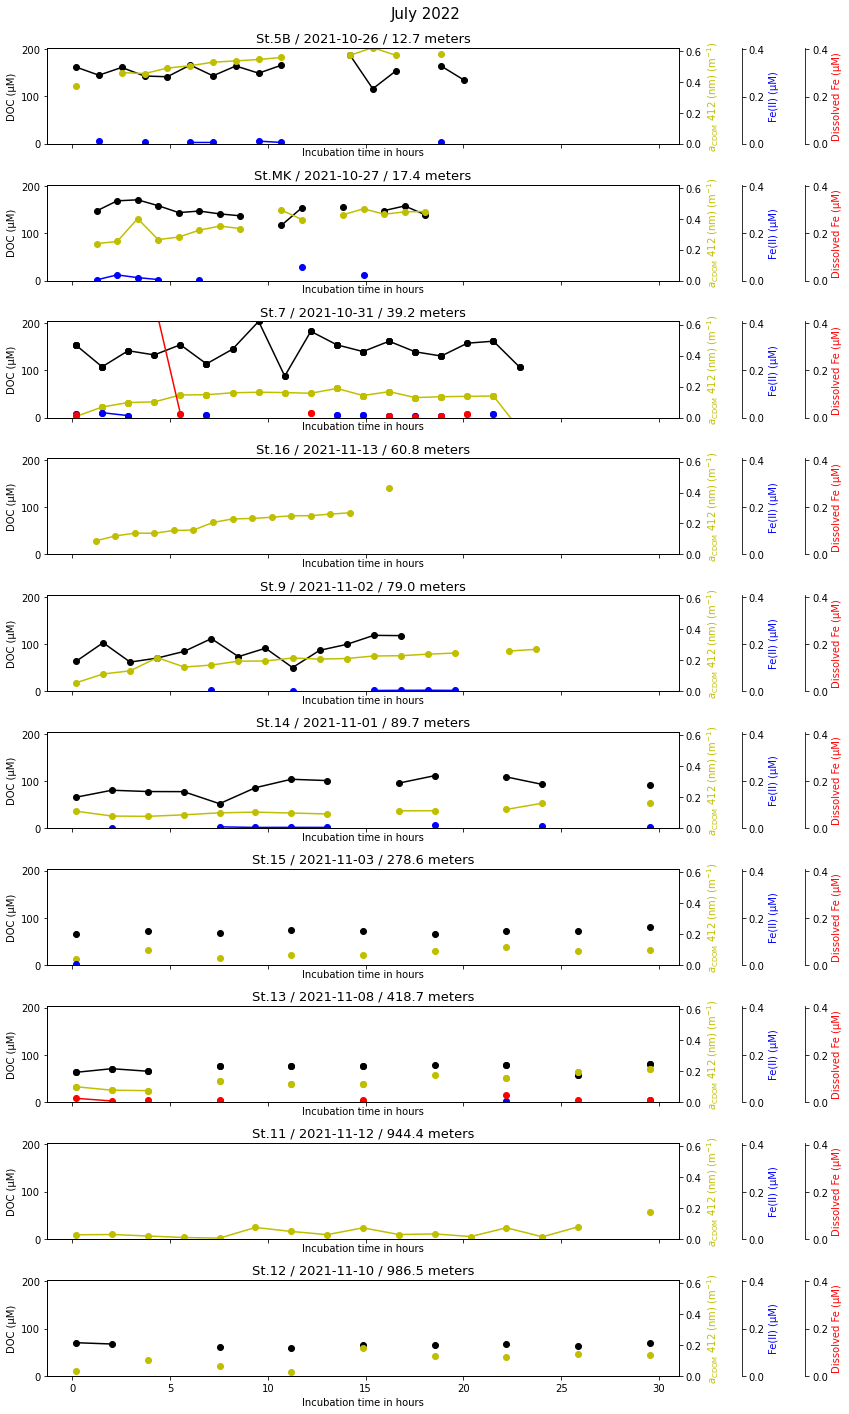

In [79]:
station_vals = col_order
fig, axs = plt.subplots(ncols=1, nrows=len(station_vals), figsize=(12, len(station_vals)*2), sharex=True)

for j, station_val in enumerate(station_vals):
    ax = axs[j]
    data = ds[(ds['Station'] == station_val)]
        
    #PLOT DOC
    DOC_uM = data['DOC_uM'] #X var 
    DOC_uM = np.asarray(DOC_uM, dtype=float).ravel()
        
    BC_time = data['BC_time'] #X var 
    BC_time = np.asarray(BC_time, dtype=float).ravel()
         
    ax.plot(BC_time, DOC_uM, 'o', ls='-', c='black')
    ax.set_ylim(0,ds['DOC_uM'].max())
    
    #plot lables 
    ax.set_ylabel('DOC (\u03BCM)', size = 10, c='black')
    ax.set_xlabel('Incubation time in hours', size= 10)
    ax.set_title(f'{station_val} / {col_dates[j]} / {col_maxd[j]} meters', size = 13)
            
    #PLOT CDOM
    abs_412 = data['abs_412'] #X var 
    abs_412 = np.asarray(abs_412, dtype=float).ravel()
    
    ax2 = ax.twinx()
    ax2.plot(BC_time, abs_412, 'o', ls='-', c='y')
    ax2.set_ylim(0,ds['abs_412'].max())
    ax2.set_ylabel(r'$a_{\mathrm{CDOM}}$ 412 (nm) (m$^{-1}$)', size= 10, c='y')
        
    Fe2_uM = data['Fe2_uM'] 
    Fe2_uM = np.asarray(Fe2_uM, dtype=float).ravel()
        
    ax3 = ax.twinx()
    ax3.spines["right"].set_position(("axes", 1.1))
    ax3.plot(BC_time, Fe2_uM, 'o', ls='-', c='b')
    ax3.set_ylim(0,ds['FeT_uM'].dropna().std()*3)
    ax3.set_ylabel('Fe(II) (\u03BCM)', size= 10, c='b')
        
    FeT_uM = data['FeT_uM']
    FeT_uM = np.asarray(FeT_uM, dtype=float).ravel()
    FeT_uM[FeT_uM > 1] = 0

    ax4 = ax.twinx()
    ax4.spines["right"].set_position(("axes", 1.2))
    ax4.plot(BC_time, FeT_uM, 'o', ls='-', c='r')
    ax4.set_ylim(0,ds['FeT_uM'].dropna().std()*3)
    ax4.set_ylabel('Dissolved Fe (\u03BCM)', size= 10, c='r')
    
# add a global title to the figure
fig.suptitle("July 2022 \n", size = 15)
fig.set_facecolor('w')
plt.tight_layout()

#save plot 
plt.savefig("../../../PROJECTS/GOM22SU_BC_incs.png")

# show the plot
plt.show()


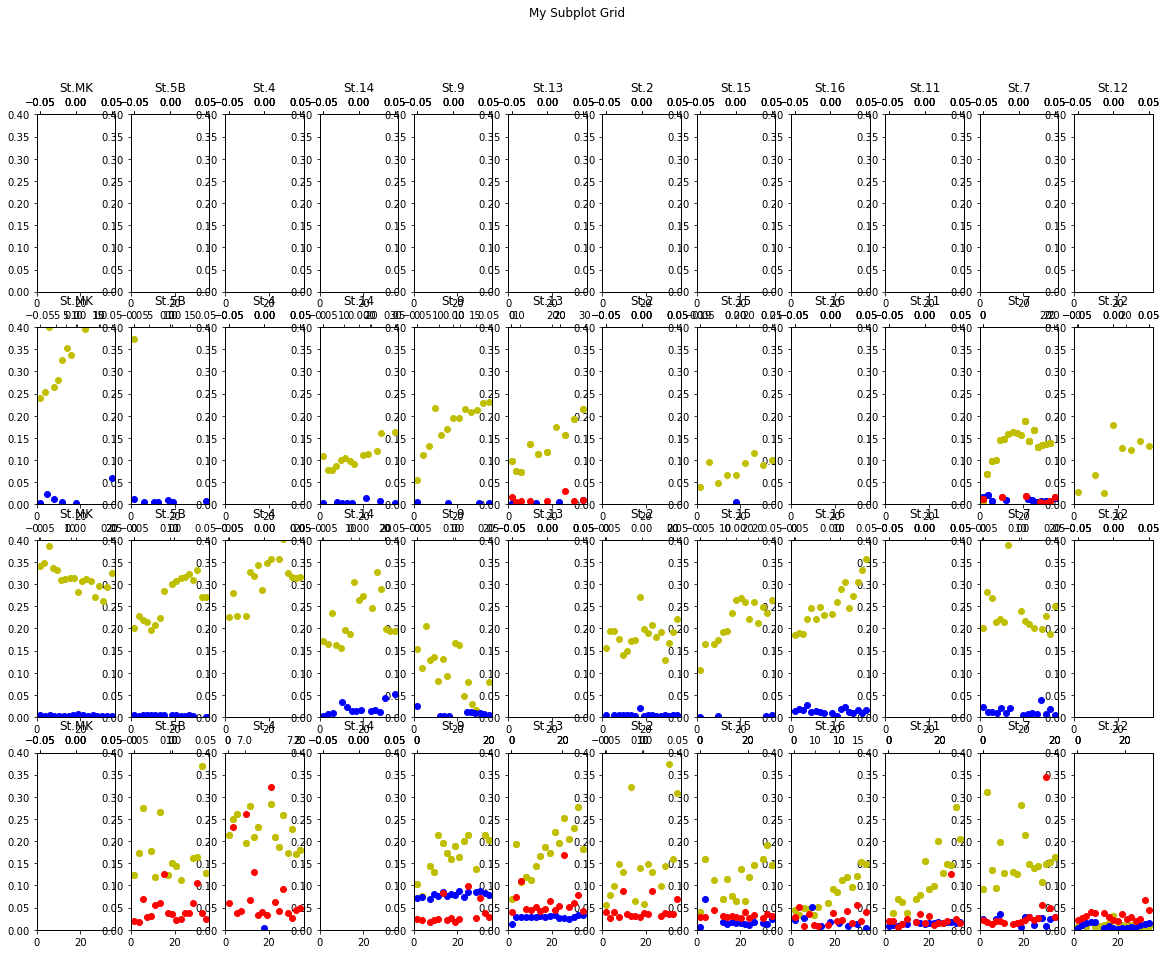

In [73]:
# get the unique values for each group
group2_vals = ds_bc['Station'].unique()
group1_vals = ds_bc['Trip'].unique()

# create a grid of subplots
fig, axs = plt.subplots(len(group1_vals), len(group2_vals), figsize=(20, 15))

# iterate over the subplots and plot the appropriate data
for i, group1_val in enumerate(group1_vals):
    for j, group2_val in enumerate(group2_vals):
        ax = axs[i, j]
        data = ds_bc[(ds_bc['Station'] == group2_val) & (ds_bc['Trip'] == group1_val)]
        data = data.dropna(subset=['DOC_uM'])
        
        DOC_uM = data['DOC_uM'] #X var 
        DOC_uM = np.asarray(DOC_uM, dtype=float).ravel()
        
        BC_time = data['BC_time'] #X var 
        BC_time = np.asarray(BC_time, dtype=float).ravel()
        
        ax.plot(BC_time, DOC_uM, 'o', ls='', c='black')
        ax.set_ylim(0,500)
        ax.set_xlim(0,36)
        
        abs_412 = data['abs_412'] #X var 
        abs_412 = np.asarray(abs_412, dtype=float).ravel()
        
        ax2 = ax.twiny()
        ax2.plot(BC_time, abs_412, 'o', ls='', c='y')
        ax2.set_ylim(0,.8)
        
        Fe2_uM = data['Fe2_uM'] 
        Fe2_uM = np.asarray(Fe2_uM, dtype=float).ravel()
        
        ax3 = ax.twiny()
        ax3.plot(BC_time, Fe2_uM, 'o', ls='', c='b')
        ax3.set_ylim(0,.4)
        
        FeT_uM = data['FeT_uM']
        FeT_uM = np.asarray(FeT_uM, dtype=float).ravel()
        
        ax4 = ax.twiny()
        ax4.plot(BC_time, FeT_uM, 'o', ls='', c='r')
        ax4.set_ylim(0,.4)
        
        ax.set_title(f'{group2_val}')

# add a global title to the figure
fig.suptitle('My Subplot Grid')

# show the plot
plt.show()